In [1]:
import itertools

# 1. Condensed Itemset Representations

## GenMax Algorithm

In [2]:
from collections import defaultdict

# Calculating the number of transactions my itemset contains
def support(itemset, transactions):
    return sum(1 for t in transactions if itemset.issubset(t))

# Finding all maximal itemsets in P
# list of tuples (hi, ti) -> itemsets hi and corresponding transaction ID ti
# minsup -> minimum support
# M -> set of maximal itemsets the algorithm found 

def GenMax(P, minsup, M, transactions):
    current_itemset = set().union(*[item for item, _ in P])
    
    # Checking if the current itemset is a subset of any maximal itemset
    if any(current_itemset.issubset(max_itemset) for max_itemset in M):
        return  # Pruning this branch

    for i, (Xi, tXi) in enumerate(P):
        Pi = []
        for j in range(i + 1, len(P)):
            Xj, tXj = P[j]
            Xij = Xi.union(Xj)
            tXij = tXi.intersection(tXj)
            if support(Xij, transactions) >= minsup:
                Pi.append((Xij, tXij))
        
        if Pi:
            GenMax(Pi, minsup, M, transactions)
        else:
            if not any(Xi.issubset(max_itemset) for max_itemset in M):
                M.add(frozenset(Xi))

# Running GenMax algorithm on the given transactions with the specificed minsup (either 3000 or 5000 in our case)
def perform_GenMax(transactions, minsup):
    items = defaultdict(set)
    for tid, transaction in enumerate(transactions):
        for item in transaction:
            items[frozenset([item])].add(tid)

    P = [(item, tids) for item, tids in items.items() if len(tids) >= minsup]
    M = set()
    GenMax(P, minsup, M, transactions)
    
    return M

# Loading dataset 
# Converting it to the list of transactions 
def load_data(file_path):
    with open(file_path, 'r') as f:
        transactions = [set(line.strip().split(',')) for line in f]
    return transactions

file_path = 'agaricus-lepiota.data'
transactions = load_data(file_path)


#### minsup = 3000

In [4]:
minsup = 3000
maximal_itemsets = perform_GenMax(transactions, minsup)

print(f"MinSup = {minsup}:")
print(f"Total frequent maximal itemsets: {len(maximal_itemsets)}")

print("\nMaximal Frequent Itemsets:")
for itemset in maximal_itemsets:
    print(f"{set(itemset)} - {support(itemset, transactions)}")

MinSup = 3000:
Total frequent maximal itemsets: 37

Maximal Frequent Itemsets:
{'f', 'c', 'x', 'p', 'o'} - 3024
{'w', 'f', 'e', 'b', 'd', 'p', 'o'} - 3032
{'w', 'e', 's', 'y', 'p', 'n', 'f', 'c', 'o'} - 3013
{'w', 'f', 't', 'g', 's', 'p'} - 3002
{'w', 'e', 's', 'y', 'p', 'n', 'f', 'b'} - 3010
{'f', 'e', 'b', 's', 'y', 'p', 'o'} - 3046
{'w', 'e', 'v', 'p', 'n', 'f', 'b', 'c', 'o'} - 3080
{'w', 'e', 'p', 'k', 'n', 'f', 't', 'b', 'o'} - 3074
{'n', 'f', 'e', 's', 'v', 'p'} - 3060
{'w', 'e', 's', 'p', 'k', 'n', 'f', 'b', 'o'} - 3008
{'w', 'f', 'e', 'b', 'x', 'p', 'o'} - 3080
{'w', 'e', 's', 'p', 'k', 'f', 't', 'b', 'o'} - 3028
{'w', 'e', 'y', 'p', 'n', 'f', 't', 'b', 'c'} - 3096
{'w', 'f', 'c', 'x', 'p'} - 3072
{'w', 'e', 's', 'y', 'p', 'n', 'f', 't', 'c'} - 3072
{'w', 'e', 'y', 'p', 'f', 't', 'b', 'c', 'o'} - 3028
{'e', 's', 'y', 'p', 'n', 'f', 'b', 'c'} - 3049
{'w', 'e', 's', 'p', 'k', 'n', 'f', 't', 'o'} - 3060
{'w', 'n', 'e', 'f', 'b', 'g', 'p'} - 3324
{'w', 'f', 's', 'v', 'p', 'o'} - 3

#### minsup = 5000

In [5]:
minsup = 5000
maximal_itemsets = perform_GenMax(transactions, minsup)

print(f"MinSup = {minsup}:")
print(f"Total frequent maximal itemsets: {len(maximal_itemsets)}")

print("\nMaximal Frequent Itemsets:")
for itemset in maximal_itemsets:
    print(f"{set(itemset)} - {support(itemset, transactions)}")

MinSup = 5000:
Total frequent maximal itemsets: 20

Maximal Frequent Itemsets:
{'f', 'b', 's', 'c', 'p'} - 5018
{'w', 'n', 'e', 'f', 'b', 'p', 'o'} - 5874
{'f', 'e', 'b', 'p', 'k'} - 5010
{'f', 's', 'c', 'p', 'o'} - 5114
{'w', 'f', 't', 'b', 's', 'p', 'o'} - 5128
{'w', 'n', 'e', 'f', 'c', 'p', 'o'} - 5416
{'w', 'f', 'e', 'b', 'c', 'p', 'o'} - 5690
{'n', 'f', 'e', 's', 'c', 'p'} - 5002
{'w', 'f', 'e', 't', 'b', 'p', 'o'} - 5032
{'w', 'f', 't', 'c', 'p'} - 5024
{'w', 'f', 'e', 't', 's', 'p', 'o'} - 5096
{'w', 'n', 'e', 'f', 's', 'p', 'o'} - 5340
{'w', 'n', 'e', 'f', 't', 'p', 'o'} - 5160
{'n', 'f', 'e', 'b', 's', 'p', 'o'} - 5132
{'w', 'f', 'e', 'b', 's', 'p', 'o'} - 5068
{'w', 'f', 's', 'c', 'p'} - 5226
{'w', 'f', 'e', 'p', 'k'} - 5208
{'n', 'f', 'e', 'b', 'c', 'p', 'o'} - 5178
{'w', 'e', 's', 'p', 'n', 'f', 't', 'b'} - 5286
{'w', 'n', 'e', 'f', 'b', 'c', 'p'} - 5334


## Charm Algorithm

## minsup = 3000 & minsup = 5000

In [34]:
import itertools

def charm(P, minsup, closed_itemsets):
    P = sorted(P, key=lambda x: len(x[1]))

    for i, (Xi, ti) in enumerate(P):
        Pi = []
        remove_list = []

        for j, (Xj, tj) in enumerate(P[i+1:], start=i+1):
            Xij = Xi | Xj
            tij = ti & tj

            if len(tij) >= minsup:
                if ti == tj:
                    P[i] = (Xij, tij)
                    remove_list.append(j)
                elif ti.issubset(tj):
                    P[i] = (Xij, tij)
                    remove_list.append(j)
                else:
                    Pi.append((Xij, tij))

        # Removing elements in reverse order to avoid indexing issues
        for index in sorted(remove_list, reverse=True):
            P.pop(index)

        if Pi:
            charm(Pi, minsup, closed_itemsets)

        if not any(Xi.issubset(Z) and ti == tz for Z, tz in closed_itemsets):
            closed_itemsets.append((Xi, ti))

    return closed_itemsets

# Loading dataset and converting to a list of transactions
def load_data(file_path):
    with open(file_path, 'r') as f:
        data = [set(line.strip().split(',')) for line in f]
    return data

file_path = 'agaricus-lepiota.data'
data = load_data(file_path)

# Filter out infrequent items and generate closed itemsets
minsup_values = [3000, 5000]
for minsup in minsup_values:
    # Filter items based on minsup
    item_counts = {item: sum(1 for d in data if item in d) for item in set(itertools.chain.from_iterable(data))}
    frequent_items = {item for item, count in item_counts.items() if count >= minsup}
    filtered_data = [d.intersection(frequent_items) for d in data]

    # Generate initial candidate itemsets
    P = [(frozenset([item]), {i for i, d in enumerate(filtered_data) if item in d}) for item in frequent_items]
    closed_itemsets = charm(P, minsup, [])

    # Print closed itemsets
    print(f"Minimum support threshold: {minsup}")
    for itemset, support in closed_itemsets:
        print(f"{set(itemset)} - {len(support)}")
    print(f"Total number of closed itemsets: {len(closed_itemsets)}")


Minimum support threshold: 3000
{'d', 'o', 'c'} - 3008
{'d', 'c'} - 3052
{'d', 'b', 'o'} - 3032
{'d', 'b'} - 3076
{'d', 'o'} - 3104
{'d'} - 3148
{'x', 'o', 'c'} - 3024
{'x', 'c'} - 3120
{'n', 'x'} - 3160
{'x', 'b', 'o'} - 3272
{'x', 'o'} - 3464
{'x', 'b'} - 3464
{'x'} - 3656
{'t', 'v'} - 3048
{'b', 'v', 's'} - 3004
{'n', 'v', 's'} - 3060
{'v', 'o', 'c', 's'} - 3002
{'c', 'v', 's'} - 3090
{'o', 'v', 's'} - 3116
{'v', 's'} - 3204
{'n', 'b', 'v', 'c', 'o'} - 3176
{'n', 'b', 'v', 'c'} - 3264
{'n', 'b', 'o', 'v'} - 3296
{'n', 'b', 'v'} - 3384
{'n', 'o', 'v', 'c'} - 3400
{'n', 'v', 'c'} - 3488
{'n', 'o', 'v'} - 3520
{'n', 'v'} - 3608
{'b', 'o', 'v', 'c'} - 3608
{'b', 'v', 'c'} - 3696
{'b', 'o', 'v'} - 3728
{'b', 'v'} - 3816
{'o', 'v', 'c'} - 3832
{'v', 'c'} - 3920
{'o', 'v'} - 3952
{'v'} - 4040
{'g', 't', 's'} - 3002
{'g', 't'} - 3068
{'g', 's'} - 3158
{'g', 'o', 'c'} - 3120
{'g', 'c'} - 3176
{'n', 'g', 'o'} - 3168
{'n', 'b', 'g'} - 3324
{'n', 'g'} - 3512
{'b', 'g', 'o'} - 3700
{'g', 'o'} - 

# 2. Sequence Mining

## PrefixSpan Algorithm

In [ ]:
from collections import defaultdict

def prefix_projection(sequence, prefix):
    projected_sequence = []
    prefix_found = False
    i = 0
    while i < len(sequence):
        itemset = sequence[i]
        if not prefix_found and prefix in itemset:
            projected_itemset = [item for item in itemset if item != prefix]
            if projected_itemset:
                projected_sequence.append(projected_itemset)
            prefix_found = True
        elif prefix_found:
            projected_sequence.append(itemset)
        i += 1
    return projected_sequence

def support(sequences, symbol):
    count = sum(1 for sequence in sequences if any(symbol in itemset for itemset in sequence))
    return count

# Defining PrefixSpan function
def PrefixSpan(database, prefix, minsup, frequent_sequences):
    counts = defaultdict(int)
    for sequence in database:
        for itemset in sequence:
            for item in itemset:
                counts[item] += 1

    frequent_items = [(item, count) for item, count in counts.items() if count >= minsup]

    for item, count in frequent_items:
        extended_prefix = prefix + [item]
        frequent_sequences.append((extended_prefix, count))
        projected_database = [prefix_projection(sequence, item) for sequence in database if prefix_projection(sequence, item)]
        PrefixSpan(projected_database, extended_prefix, minsup, frequent_sequences)

    return frequent_sequences


# Reading the data file and creating the database

with open('sequencedb.txt', 'r') as f:
    lines = f.readlines()

database = []
current_sequence = []
i = 0

while i < len(lines):
    line = lines[i].strip()
    if line.startswith('>'):
        if current_sequence:
            database.append(current_sequence)
            current_sequence = []
    else:
        current_sequence.extend([[char] for char in line])
    i += 1

if current_sequence:
    database.append(current_sequence)

# Setting the minimum support value (a reasonable value to reduce runtime)
minsup = 50000

# Running PrefixSpan algorithm
frequent_sequences = PrefixSpan(database, [], minsup, [])

# Printing the frequent sequences and their supports
print("Frequent sequences:")
_ = [print(f"{sequence} - {support}") for sequence, support in frequent_sequences]
print(f"Total number of frequent sequences: {len(frequent_sequences)}")


Frequent sequences:
['T'] - 64934
['T', 'T'] - 63872
['T', 'T', 'T'] - 62810
['T', 'T', 'T', 'T'] - 61748
['T', 'T', 'T', 'T', 'T'] - 60686
['T', 'T', 'T', 'T', 'T', 'A'] - 60875
['T', 'T', 'T', 'T', 'T', 'A', 'T'] - 58093
['T', 'T', 'T', 'T', 'T', 'A', 'T', 'T'] - 57031
['T', 'T', 'T', 'T', 'T', 'A', 'T', 'T', 'A'] - 57615
['T', 'T', 'T', 'T', 'T', 'A', 'T', 'T', 'A', 'A'] - 56555
['T', 'T', 'T', 'T', 'T', 'A', 'T', 'T', 'A', 'A', 'A'] - 55496
['T', 'T', 'T', 'T', 'T', 'A', 'T', 'T', 'A', 'A', 'A', 'T'] - 52035
['T', 'T', 'T', 'T', 'T', 'A', 'T', 'T', 'A', 'A', 'A', 'T', 'A'] - 53093
['T', 'T', 'T', 'T', 'T', 'A', 'T', 'T', 'A', 'A', 'A', 'T', 'A', 'A'] - 52037
['T', 'T', 'T', 'T', 'T', 'A', 'T', 'T', 'A', 'A', 'A', 'T', 'A', 'A', 'A'] - 50986
['T', 'T', 'T', 'T', 'T', 'A', 'T', 'T', 'A', 'A', 'A', 'T', 'T'] - 50976
['T', 'T', 'T', 'T', 'T', 'A', 'T', 'T', 'A', 'A', 'A', 'T', 'T', 'A'] - 51903
['T', 'T', 'T', 'T', 'T', 'A', 'T', 'T', 'A', 'A', 'A', 'T', 'T', 'A', 'A'] - 50851
['T', 'T

# 3. Clustering 

## Using Library

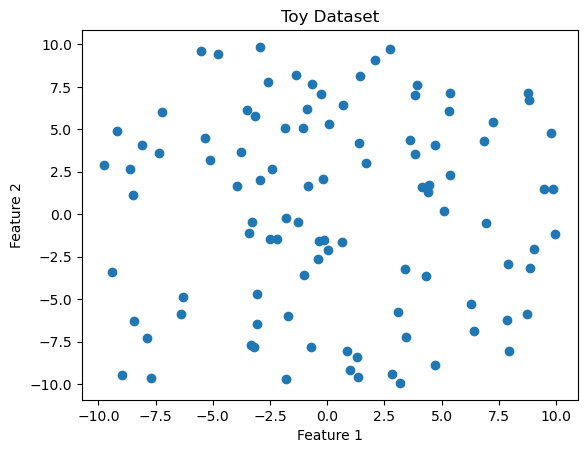

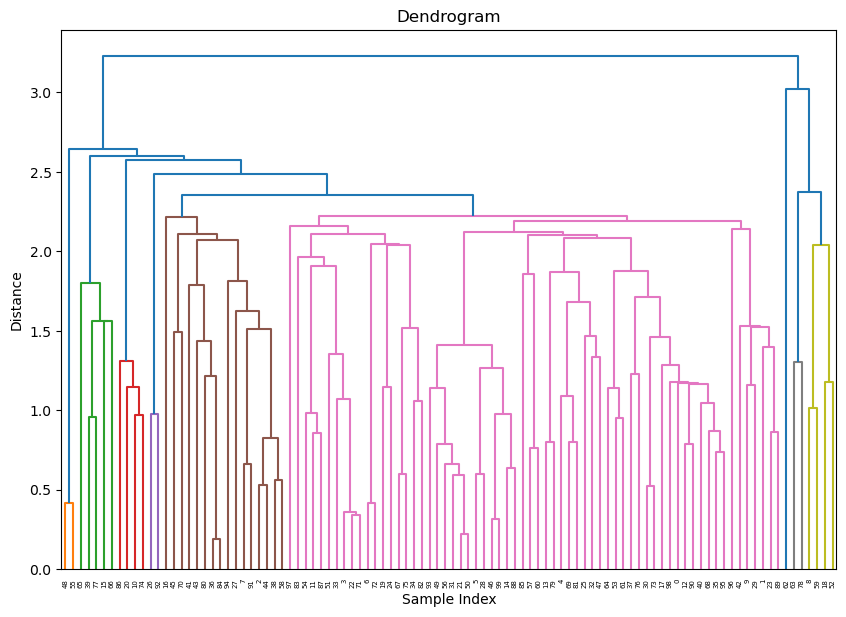

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Randomly creating a toy dataset of 100 instances spread across a 2D plane (two features)
dataset = [[random.uniform(-10, 10), random.uniform(-10, 10)] for _ in range(100)]
data = np.array(dataset)

# Plotting the dataset to visualize 
plt.scatter(data[:, 0], data[:, 1])
plt.title('Toy Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Performing Agglomerative Hierarchical Clustering with
# Euclidean as between-points distance measure and Single Link as between-clusters distance measure
Z = linkage(data, method='single', metric='euclidean')

# Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


## Trying Manual Clustering Implementation

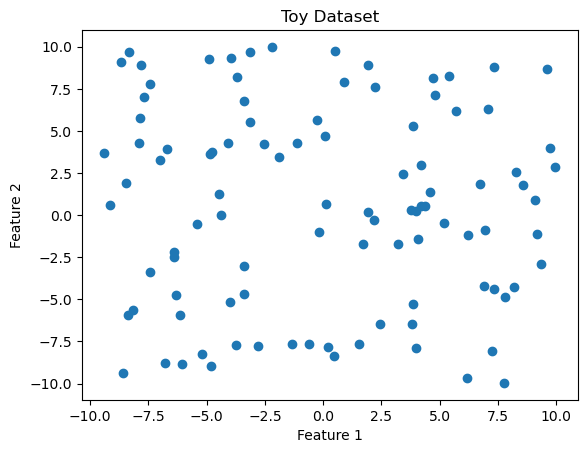

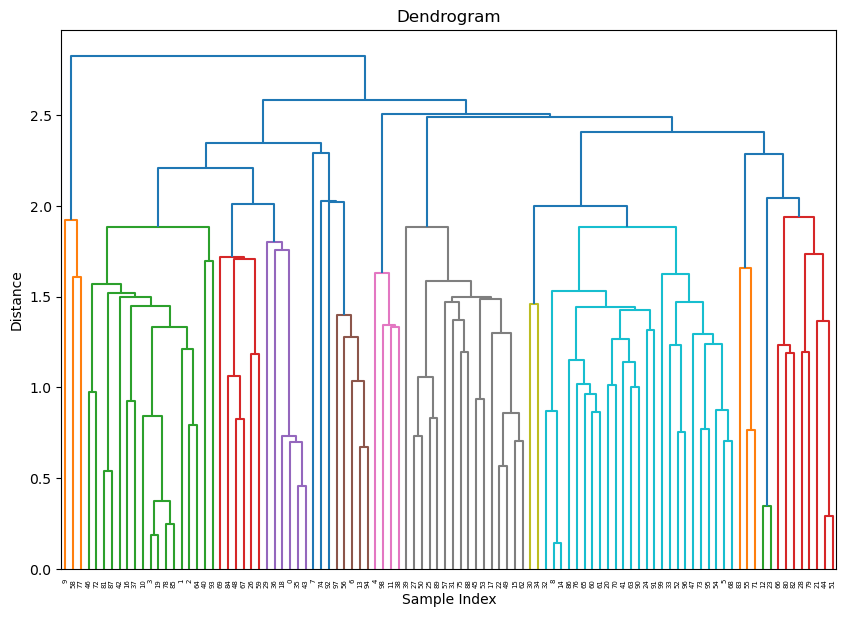

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# Randomly creating a toy dataset of 100 instances spread across a 2D plane (two features)
dataset = [[random.uniform(-10, 10), random.uniform(-10, 10)] for _ in range(100)]
data = np.array(dataset)

# Plotting the dataset to visualize 
plt.scatter(data[:, 0], data[:, 1])
plt.title('Toy Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Euclidean Distance
def euclidean_distance(point1, point2):
    return np.linalg.norm(np.array(point1) - np.array(point2))

# Implementing Agglomerative Hierarchical Clustering
def hierarchical_clustering(data):
    clusters = {i: [pt] for i, pt in enumerate(data)}
    distances = {
        (i, j): euclidean_distance(data[i], data[j])
        for i in range(len(data)) for j in range(i + 1, len(data))
    }
    merges = []
    current_cluster_index = len(clusters)

    while len(clusters) > 1:
        (i, j), min_distance = min(distances.items(), key=lambda item: item[1])
        merges.append([i, j, min_distance, len(clusters[i]) + len(clusters[j])])

        # Merging clusters i and j
        clusters[current_cluster_index] = clusters[i] + clusters[j]
        del clusters[i]
        del clusters[j]
        
        # Updating distances
        distances = {
            (min(ci, cj), max(ci, cj)): dist
            for (ci, cj), dist in distances.items() if ci != i and ci != j and cj != i and cj != j
        }
        for k in clusters:
            if k != current_cluster_index:
                new_dist = min(euclidean_distance(pt1, pt2) for pt1 in clusters[current_cluster_index] for pt2 in clusters[k])
                distances[(min(current_cluster_index, k), max(current_cluster_index, k))] = new_dist
        
        current_cluster_index += 1

    return merges

# Running hierarchical clustering
merges = hierarchical_clustering(data)

# Creating linkage matrix for dendrogram
Z = np.array([[merge[0], merge[1], merge[2], merge[3]] for merge in merges])

# Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()
